In [1]:
# Task 4 is about sharpening edges/details. Subtract the filtered image from the original.
# Convert to greyscale 
# Student Name: Aaron Baggot
# STudent Number: C22716399


In [2]:
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

print(glob.glob("data/samples/*"))


[]


In [3]:
# open image
img_path = Path("/Users/aaronbaggot/Desktop/image-processing-labs/data/samples/forrest.jpg")
I = cv2.imread(str(img_path))

if I is None:
    raise exception("Image not found at path")

print("Loaded image shape (H, W, C):", I.shape)

Loaded image shape (H, W, C): (4896, 3264, 3)


In [4]:
# Resize the image and convert BGR to RGB
I_512 = cv2.resize(I, (512, 512), interpolation = cv2.INTER_LINEAR)
I_rgb = cv2.cvtColor(I_512, cv2.COLOR_BGR2RGB)


In [5]:
# Sharpening Kernal 3 x 3

In [6]:
amount = 1.0  # 0.5, 1.0, 1.5, 2.0 Tested different options 

# This creates a kernel
# [[ 0,   -a,    0],
#  [-a, 1+4a, -a],
#  [ 0,   -a,    0]]

k = np.array([
    [0, -amount, 0],
    [-amount, 1 + 4 * amount, -amount],
    [0, -amount, 0]
], dtype=np.float32)

In [7]:
# Apply filteer to color image
# ddept = -1 keeps the same dtype

sharp_rgb = cv2.filter2D(I_rgb, ddepth=-1, kernel=k)


In [8]:
# Subtract the filtered image from the original
# cv2.subtract(original, sharpened)

diff_rgb = cv2.subtract(I_rgb, sharp_rgb)

# grayscale for cleaner image
diff_gray = cv2.cvtColor(diff_rgb, cv2.COLOR_RGB2GRAY)


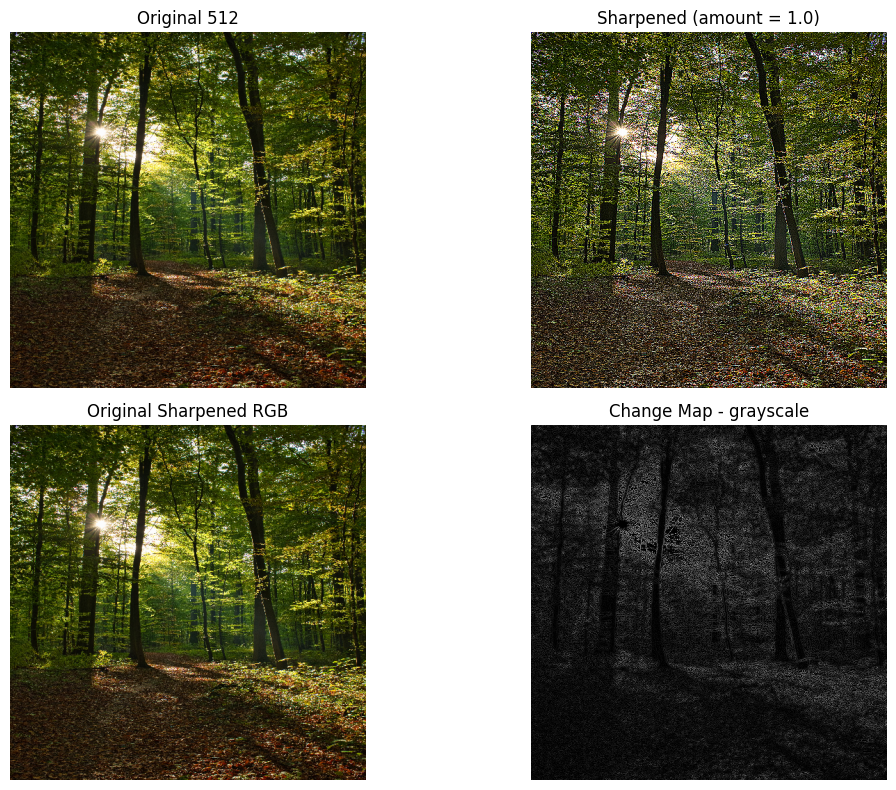

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original 512")
plt.imshow(I_rgb)
plt.axis("off")


plt.subplot(2, 2, 2)
plt.title(f"Sharpened (amount = {amount})")
plt.imshow(sharp_rgb)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Original Sharpened RGB")
plt.imshow(I_rgb)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Change Map - grayscale")
plt.imshow(diff_gray, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
# The sharpening kernal is applied to the image using convolution through OpenCV filter 2D
# produces an enhanced version. 
# It subtracts the sharpened image from the original generating a different map
# This is used to improve image clarity
# The kernel used includes a central positive value surrounded by negative weights 


In [ ]:
# [1] R. C. Gonzalez, R. E. Woods, and S. L. Eddins, Digital image processing using MATLAB. Upper Saddle River, NJ: Pearson, Prentice Hall, 2004.